In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint as pp
import seaborn as sns

In [2]:
import pingouin as pg

In [3]:
ssr = pd.read_csv("20240205_test_run.csv")

/home/sb/projects/ufm/SHARKFin/sharkfin-env/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Grid:
```
mmsize = [105]
mm_lucas_factor =[0.0, 0.001,1.0]
inst_val_std = [0.1]

SHARKFin parameters:

--attention [0.001,0.01, 0.1, 1.0]
--dphm [1, 148, 1097, 8103] # (e^0, e^5, e^7, e^9)
--zeta [0, 0.01, 1.0]
```

In [4]:
pp(list(ssr.columns))

['Unnamed: 0',
 'PartitionKey',
 'RowKey',
 'ammps',
 'ammps_config_cmd',
 'ammps_config_gen',
 'attention',
 'cmdBundle',
 'dphm',
 'expectations',
 'experimentName',
 'inst_val_std',
 'mmlucasfactor',
 'quarters',
 'seed',
 'sharkfin',
 'simid',
 'simulation',
 'start_ammps_cmd',
 'start_sharkfin_cmd',
 'status',
 'tag',
 'timestamp',
 'zeta',
 'Expectations_RiskyAvg_mean_final',
 'Expectations_RiskyAvg_std_final',
 'Expectations_RiskyStd_mean_final',
 'Expectations_RiskyStd_std_final',
 'aLvl_meanall',
 'aLvl_stdall',
 'delta_t1',
 'delta_t2',
 'dividend_growth_rate',
 'dividend_shock_std',
 'dollars_per_hark_money_unit',
 'end_day',
 'endtime',
 'error_message',
 'filename',
 'idx_max_asset_price',
 'idx_max_buy_limit',
 'idx_max_sell_limit',
 'idx_min_asset_price',
 'kurtosis_buy_limit',
 'kurtosis_sell_limit',
 'log_return_DW_statistic',
 'log_return_autocorrelation_from_DW',
 'log_return_squared_DW_statistic',
 'log_return_squared_autocorrelation_from_DW',
 'mNrm_ratio_StE_meana

In [5]:
ssr = ssr[ssr['status'] == 'Simulation Complete']

In [6]:
ssr

,Unnamed: 0,PartitionKey,RowKey,ammps,ammps_config_cmd,ammps_config_gen,attention,cmdBundle,dphm,expectations,...,ror_volatility,seconds,skew_buy_limit,skew_sell_limit,status_code,std_asset_price,std_buy_limit,std_sell_limit,total_population_aLvl_mean,total_population_aLvl_std
3,3,jebosim,1000,"{""ammps_config_file_name"": ""test_conf1000.xlsx...",/usr/bin/python3 /usr/simulation/ammps_config_...,"{""parameters"": ""{\""seed\"": \""30253\"", \""name\""...",0.001,/usr/bin/python3 /usr/simulation/ammps_config_...,148,InferentialExpectations,...,0.103139,1277.0,2.333819,0.647298,1.0,NaN,5.181557,854.227273,5.759335,25.615630
4,4,jebosim,10000,"{""ammps_config_file_name"": ""test_conf10000.xls...",/usr/bin/python3 /usr/simulation/ammps_config_...,"{""parameters"": ""{\""seed\"": \""30253\"", \""name\""...",0.100,/usr/bin/python3 /usr/simulation/ammps_config_...,8103,InferentialExpectations,...,0.152075,112.0,1.572947,-0.763768,1.0,NaN,1333.195443,10372.065493,141.547611,42.546772
5,5,jebosim,10001,"{""ammps_config_file_name"": ""test_conf10001.xls...",/usr/bin/python3 /usr/simulation/ammps_config_...,"{""parameters"": ""{\""seed\"": \""45271\"", \""name\""...",0.100,/usr/bin/python3 /usr/simulation/ammps_config_...,8103,InferentialExpectations,...,0.209245,107.0,1.578474,0.527788,1.0,NaN,2463.818225,19865.688555,103.876527,30.935329
6,6,jebosim,10002,"{""ammps_config_file_name"": ""test_conf10002.xls...",/usr/bin/python3 /usr/simulation/ammps_config_...,"{""parameters"": ""{\""seed\"": \""76742\"", \""name\""...",0.100,/usr/bin/python3 /usr/simulation/ammps_config_...,8103,InferentialExpectations,...,0.132019,124.0,0.675596,-0.138315,1.0,NaN,1544.322198,18732.906266,171.575703,49.302255
7,7,jebosim,10003,"{""ammps_config_file_name"": ""test_conf10003.xls...",/usr/bin/python3 /usr/simulation/ammps_config_...,"{""parameters"": ""{\""seed\"": \""39712\"", \""name\""...",0.100,/usr/bin/python3 /usr/simulation/ammps_config_...,8103,InferentialExpectations,...,0.151041,128.0,1.114295,-0.715035,1.0,NaN,1977.282943,10893.419569,122.781883,37.415171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,14395,jebosim,9995,"{""ammps_config_file_name"": ""test_conf9995.xlsx...",/usr/bin/python3 /usr/simulation/ammps_config_...,"{""parameters"": ""{\""seed\"": \""75400\"", \""name\""...",0.100,/usr/bin/python3 /usr/simulation/ammps_config_...,8103,InferentialExpectations,...,0.190601,116.0,1.933820,0.489965,1.0,NaN,7931.623481,20785.067732,120.479914,36.291265
14396,14396,jebosim,9996,"{""ammps_config_file_name"": ""test_conf9996.xlsx...",/usr/bin/python3 /usr/simulation/ammps_config_...,"{""parameters"": ""{\""seed\"": \""72823\"", \""name\""...",0.100,/usr/bin/python3 /usr/simulation/ammps_config_...,8103,InferentialExpectations,...,0.186235,120.0,1.975843,0.853422,1.0,NaN,1937.660228,22908.206045,103.466219,31.323135
14397,14397,jebosim,9997,"{""ammps_config_file_name"": ""test_conf9997.xlsx...",/usr/bin/python3 /usr/simulation/ammps_config_...,"{""parameters"": ""{\""seed\"": \""76111\"", \""name\""...",0.100,/usr/bin/python3 /usr/simulation/ammps_config_...,8103,InferentialExpectations,...,0.136150,124.0,1.199027,-1.017700,1.0,NaN,1118.682618,10769.459840,154.069707,46.199795
14398,14398,jebosim,9998,"{""ammps_config_file_name"": ""test_conf9998.xlsx...",/usr/bin/python3 /usr/simulation/ammps_config_...,"{""parameters"": ""{\""seed\"": \""45007\"", \""name\""...",0.100,/usr/bin/python3 /usr/simulation/ammps_config_...,8103,InferentialExpectations,...,0.229301,116.0,2.262613,0.475217,1.0,NaN,4392.317548,30281.953035,67.591584,20.570070


In [32]:
ssr.groupby('status_code').first()['error_message']

status_code
0.0                                                 None
1.0    AMMPS Market Failure: Stopped: Hit market make...
3.0    AMMPS Market Failure: Stopped: Simulated final...
Name: error_message, dtype: object

In [35]:
ssr.groupby('status_code').first()['error_message'][1.0]

'AMMPS Market Failure: Stopped: Hit market maker price range, shutting market down. ABC MarketMaker Best Ask and Best Bid is outside range 20 , -4 at 2017-06-27 13:43:08.886277\n'

In [41]:
ssr[ssr['status_code'] == 1.0].shape

(8206, 86)

In [36]:
ssr.groupby('status_code').first()['error_message'][3.0]

'AMMPS Market Failure: Stopped: Simulated final day but did not receive signal to end. Timed out after 6 times'

In [40]:
ssr[ssr['status_code'] == 3.0].shape

(6, 86)

In [7]:
ssr['log_zeta'] = np.log1p(ssr['zeta'])
ssr['log_attention'] = np.log(ssr['attention'])
ssr['log_dphm'] = np.log(ssr['dphm'])
ssr['log_mmlucasfactor'] = np.log(ssr['mmlucasfactor'])
ssr['log_pop_aLvl_mean'] = np.log(ssr['total_population_aLvl_mean'])
ssr['log_aLvlmeanall'] = np.log(ssr['aLvl_meanall'])
ssr['log_max_sell_limit'] = np.log(ssr['max_sell_limit'])
ssr['log_max_buy_limit'] = np.log(ssr['max_buy_limit'])

ssr['net_shares'] = ssr['mean_buy_limit'] - ssr['mean_sell_limit']
ssr['log_net_shares'] = np.nan_to_num(np.log(np.abs(ssr['net_shares'])) \
                                      * np.sign(ssr['net_shares']))

/home/sb/projects/ufm/SHARKFin/sharkfin-env/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

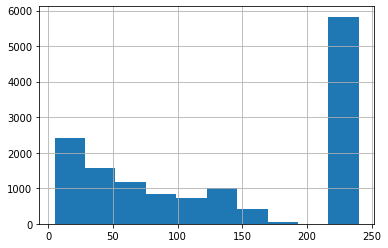

In [8]:
ssr['end_day'].hist()

<Axes: xlabel='end_day', ylabel='Count'>

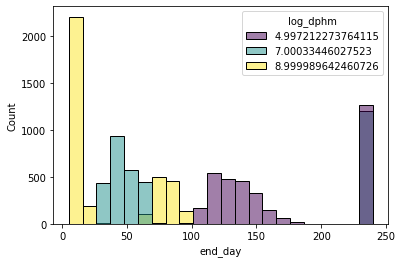

In [22]:
sns.histplot(
    data = ssr[ssr['dphm'] > 10],
    x = 'end_day',
    #y = 'end_day',
    hue = 'log_dphm',
    palette = 'viridis'
)

<Axes: xlabel='end_day', ylabel='log_net_shares'>

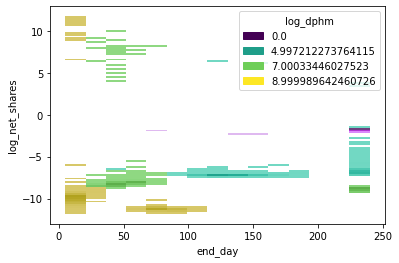

In [25]:
sns.histplot(
    data = ssr,
    x = 'end_day',
    y = 'log_net_shares',
    hue = 'log_dphm',
    palette = 'viridis'
)

<Axes: xlabel='end_day', ylabel='log_net_shares'>

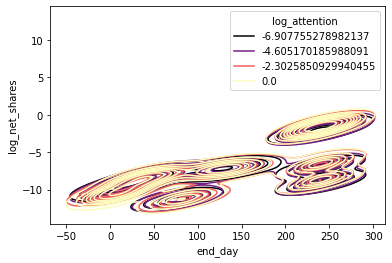

In [47]:
sns.kdeplot(
    data = ssr,
    x = 'end_day',
    y = 'log_net_shares',
    hue = 'log_attention',
    palette = 'magma'
)

<Axes: xlabel='end_day', ylabel='log_net_shares'>

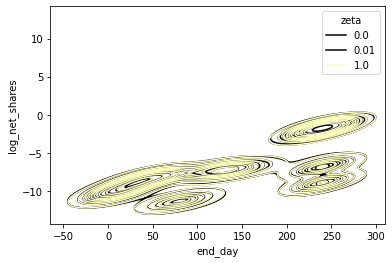

In [46]:
sns.kdeplot(
    data = ssr,
    x = 'end_day',
    y = 'log_net_shares',
    hue = 'zeta',
    palette = 'magma'
)

<Axes: xlabel='attention', ylabel='zeta'>

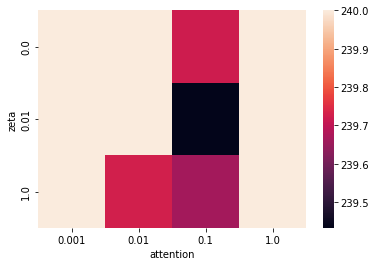

In [48]:
sns.heatmap(
    data = ssr[ssr['dphm'] == 1].pivot_table(
        index = 'zeta',
        columns = 'attention',
        values = 'end_day'
    )
)

<Axes: xlabel='attention', ylabel='zeta'>

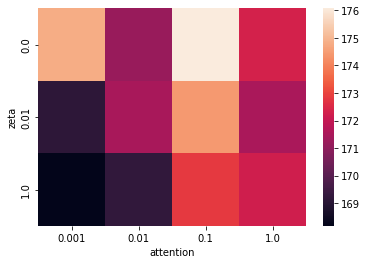

In [77]:
sns.heatmap(
    data = ssr[ssr['dphm'] == 148].pivot_table(
        index = 'zeta',
        columns = 'attention',
        values = 'end_day'
    )
)

<Axes: xlabel='attention', ylabel='zeta'>

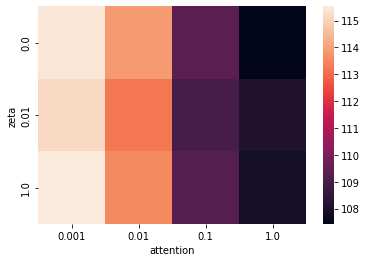

In [78]:
sns.heatmap(
    data = ssr[ssr['dphm'] == 1097].pivot_table(
        index = 'zeta',
        columns = 'attention',
        values = 'end_day'
    )
)

<Axes: xlabel='attention', ylabel='zeta'>

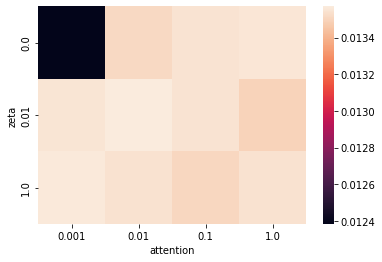

In [49]:
sns.heatmap(
    data = ssr[ssr['dphm'] == 1].pivot_table(
        index = 'zeta',
        columns = 'attention',
        values = 'ror_volatility'
    )
)

<Axes: xlabel='attention', ylabel='zeta'>

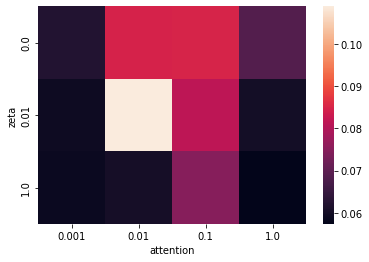

In [50]:
sns.heatmap(
    data = ssr[ssr['dphm'] == 148].pivot_table(
        index = 'zeta',
        columns = 'attention',
        values = 'ror_volatility'
    )
)

<Axes: xlabel='attention', ylabel='zeta'>

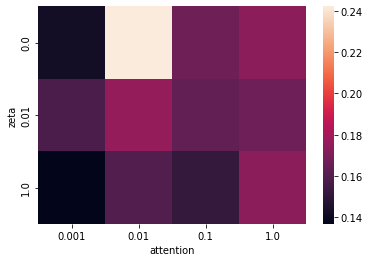

In [83]:
sns.heatmap(
    data = ssr[ssr['dphm'] == 1097].pivot_table(
        index = 'zeta',
        columns = 'attention',
        values = 'ror_volatility'
    )
)

<Axes: xlabel='attention', ylabel='zeta'>

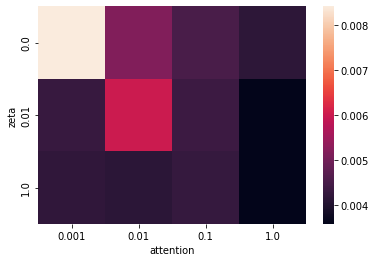

In [101]:
sns.heatmap(
    data = ssr[ssr['end_day'] > 200].pivot_table(
        index = 'zeta',
        columns = 'attention',
        values = 'ror_mean'
    )
)

<Axes: xlabel='attention', ylabel='zeta'>

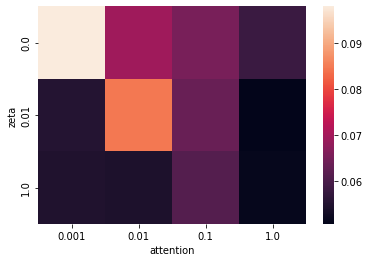

In [103]:
sns.heatmap(
    data = ssr[ssr['end_day'] > 200].pivot_table(
        index = 'zeta',
        columns = 'attention',
        values = 'ror_volatility'
    )
)

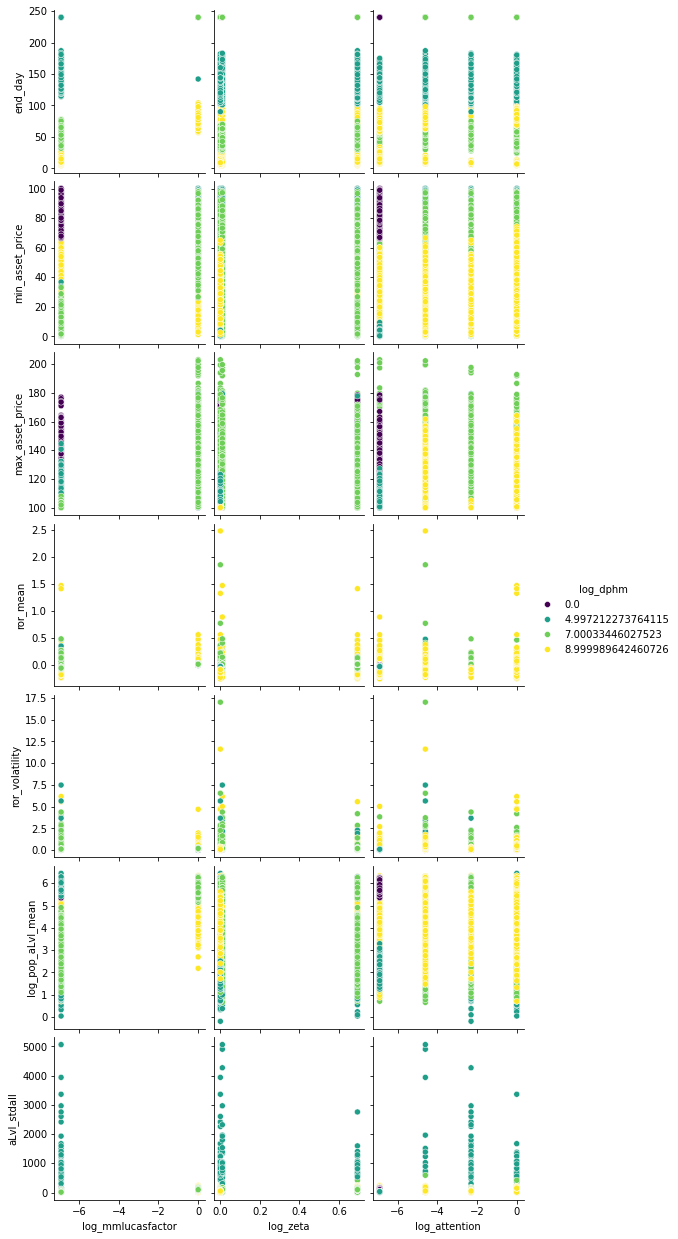

In [55]:
sns.pairplot(
    data = ssr,
    x_vars = [
        "log_mmlucasfactor",
        "log_zeta",
        'log_attention',
        #'log_dphm',
    ],
    y_vars = [
        'end_day',
        'min_asset_price',
        'max_asset_price',
        'ror_mean',
        'ror_volatility',
        'log_pop_aLvl_mean',
        'aLvl_stdall',
    ],
    hue = 'log_dphm',
    palette = 'viridis'
)

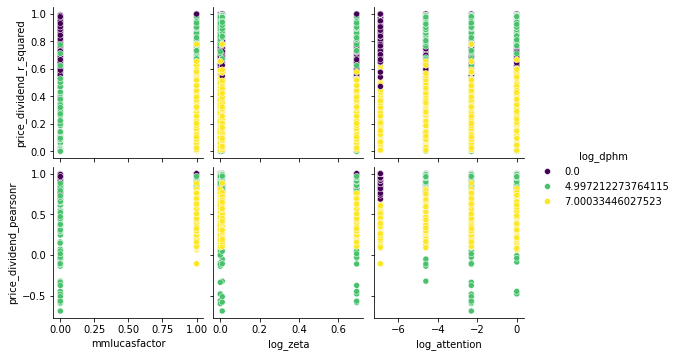

In [57]:
sns.pairplot(
    data = ssr[ssr['end_day'] > 200],
    x_vars = [
        "mmlucasfactor",
        "log_zeta",
        'log_attention',
    ],
    y_vars = [
        #'log_return_autocorrelation_from_DW',
        #'log_return_squared_autocorrelation_from_DW',
        'price_dividend_r_squared',
        'price_dividend_pearsonr',
    ],
    hue = 'log_dphm',
    palette = 'viridis'
)

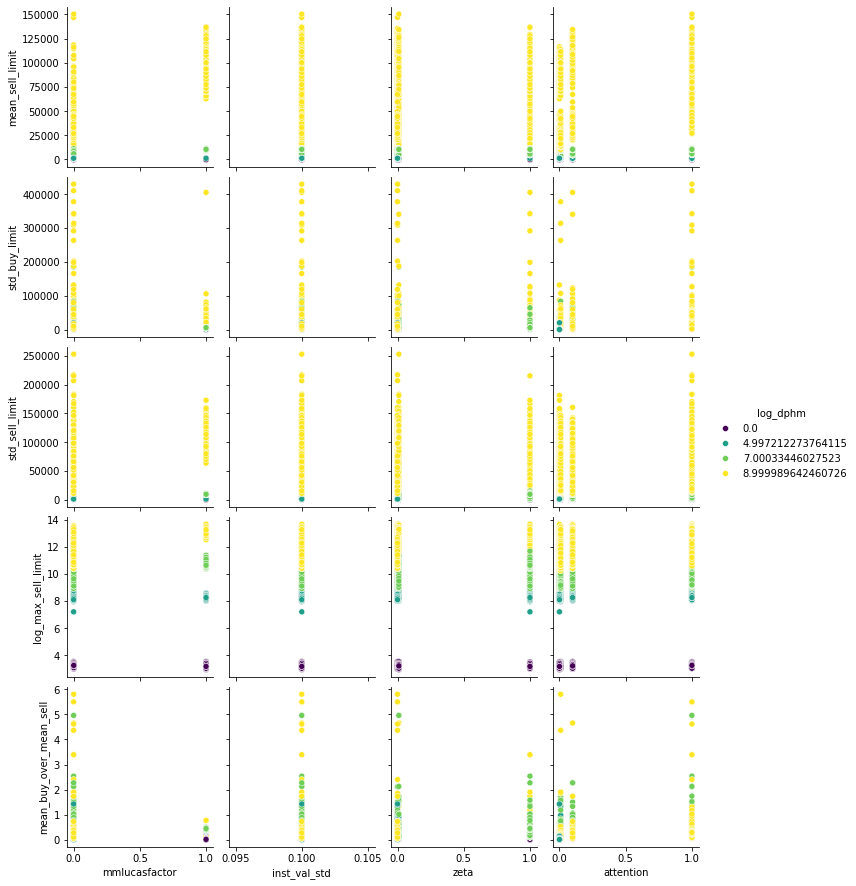

In [61]:
ssr['mean_buy_over_mean_sell'] = ssr['mean_buy_limit'] / ssr['mean_sell_limit']

sns.pairplot(
    data = ssr,
    x_vars = [
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
    ],
    y_vars = [
        'mean_sell_limit',
        'std_buy_limit',
        'std_sell_limit',
        'log_max_sell_limit',
        'mean_buy_over_mean_sell'
    ],
    hue = 'log_dphm',
    palette = 'viridis'
)

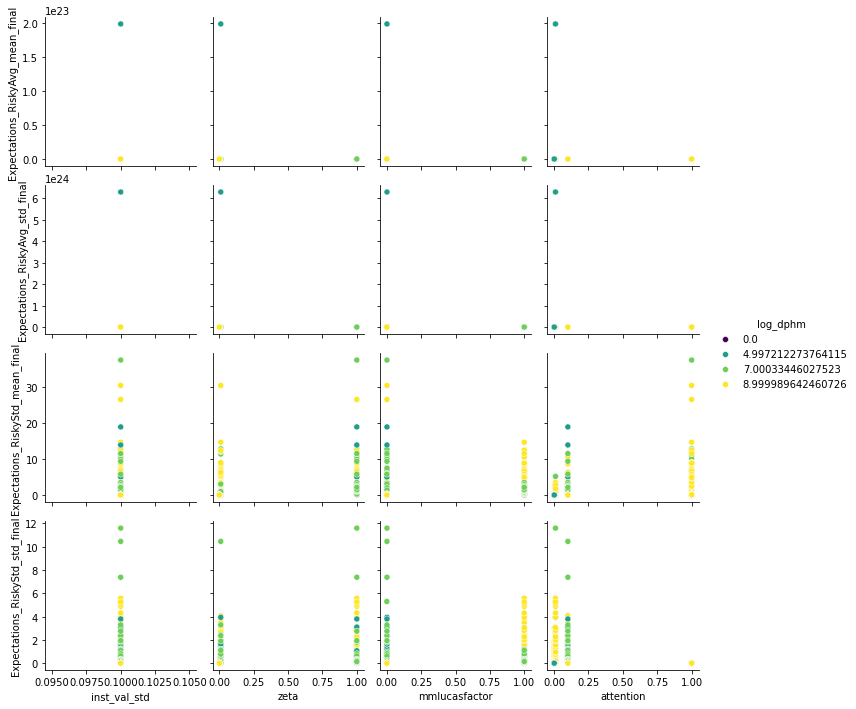

In [62]:
sns.pairplot(
    data = ssr,
    x_vars = [
        #'mmsize',
        "inst_val_std",
        "zeta",
        "mmlucasfactor",
        'attention',
    ],
    y_vars = [
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final',
        'Expectations_RiskyStd_std_final',
    ],
    hue = 'log_dphm',
    palette = 'viridis'
)

<Axes: xlabel='price_dividend_r_squared', ylabel='Density'>

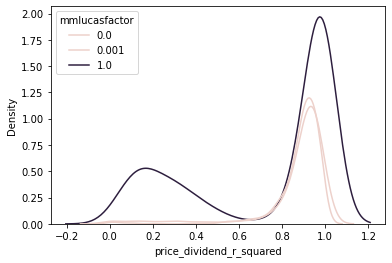

In [33]:
sns.kdeplot(
    data = ssr,
    x = ,
    hue = 

<Axes: xlabel='mmlucasfactor', ylabel='log_dphm'>

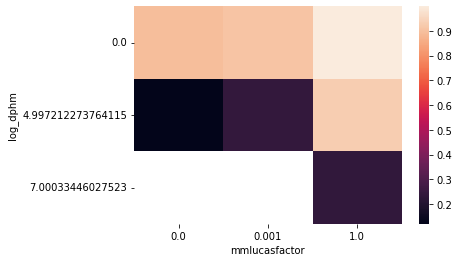

In [64]:
sns.heatmap(
    data = ssr.pivot_table(
        index = 'log_dphm',
        columns = 'mmlucasfactor',
        values = 'price_dividend_r_squared'
    )
)

In [67]:
ssr['price_dividend_r_squared'].isna().sum()

8213

In [68]:
(~ssr['price_dividend_r_squared'].isna()).sum()

5827

<Axes: xlabel='log_ror_volatility', ylabel='Density'>

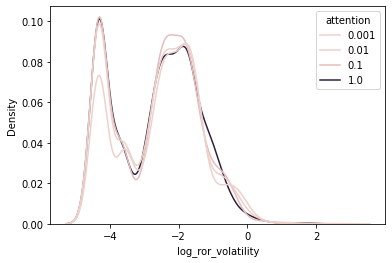

In [39]:
sns.kdeplot(
    data = ssr,
    x = 'log_ror_volatility',
    hue = 'attention'
)

<Axes: xlabel='zeta', ylabel='attention'>

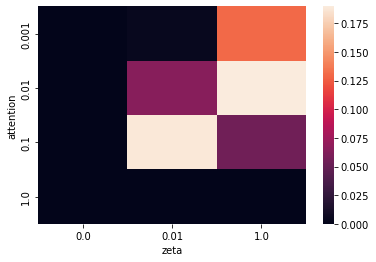

In [70]:
sns.heatmap(
    data = ssr[ssr['end_day'] > 200].pivot_table(
        index = 'attention',
        columns = 'zeta',
        values = 'Expectations_RiskyStd_std_final',
    )
)

Extra stuff below this line...

------------------------

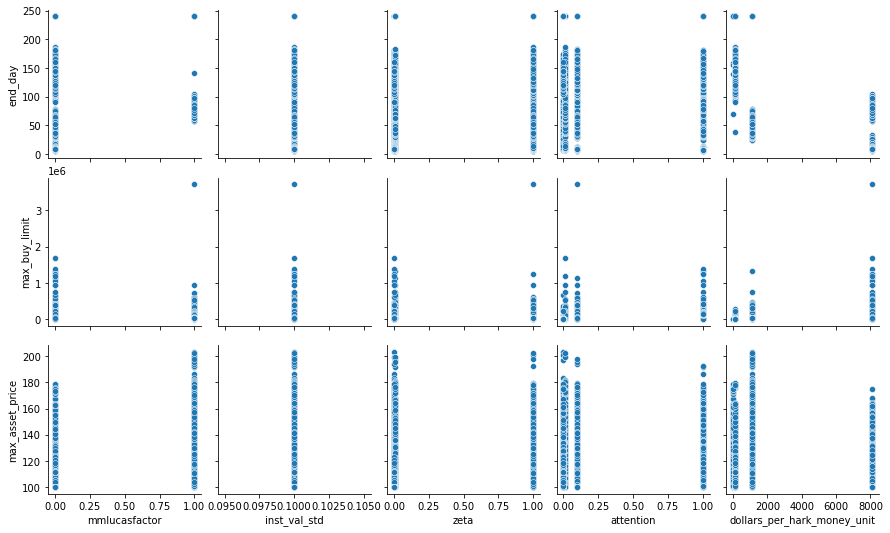

In [47]:
sns.pairplot(
    data = ssr,
    x_vars = [
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
    ],
    y_vars = [
        'end_day',
        'max_buy_limit',
        'max_asset_price'
    ]
)

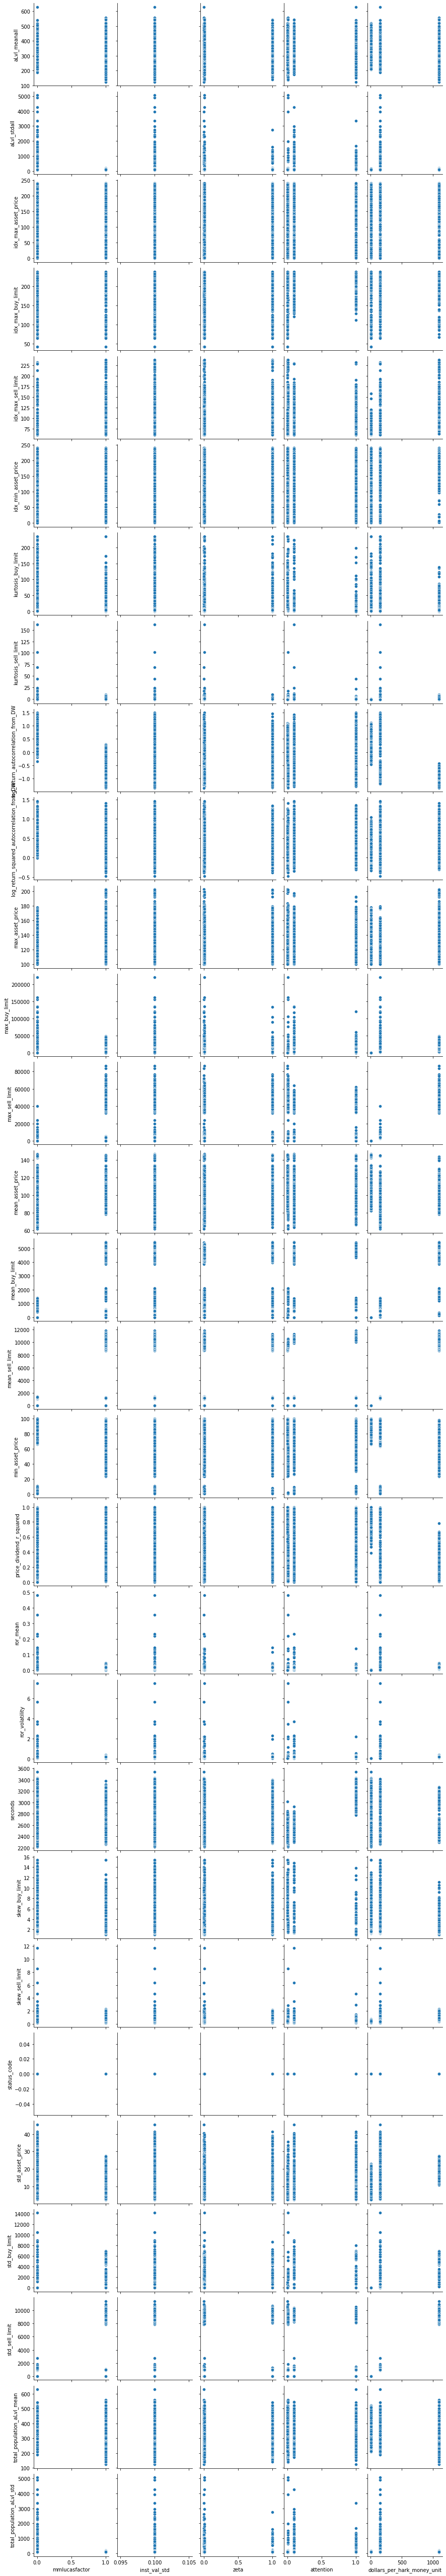

In [96]:
sns.pairplot(
    data = ssr[ssr['end_day'] > 200],
    x_vars = [
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
    ],
    y_vars = [
        'aLvl_meanall', 'aLvl_stdall',
        'idx_max_asset_price', 'idx_max_buy_limit', 'idx_max_sell_limit',
        'idx_min_asset_price', 'kurtosis_buy_limit',
        'kurtosis_sell_limit', 
        'log_return_autocorrelation_from_DW',
        'log_return_squared_autocorrelation_from_DW',
        'max_asset_price',
        'max_buy_limit', 'max_sell_limit', 'mean_asset_price', 'mean_buy_limit',
        'mean_sell_limit', 'min_asset_price',
        'price_dividend_r_squared',
        'ror_mean',
        'ror_volatility',
        'seconds',
        'skew_buy_limit', 'skew_sell_limit',
        'status_code', 'std_asset_price',
        'std_buy_limit', 'std_sell_limit',
        'total_population_aLvl_mean', 'total_population_aLvl_std'
    ]
)

<Axes: xlabel='attention', ylabel='ror_mean'>

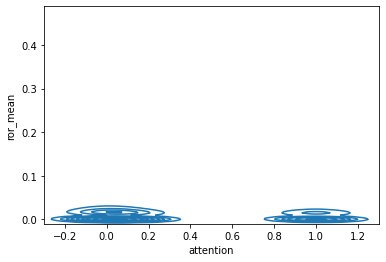

In [98]:
sns.kdeplot(
    data = ssr[ssr['end_day'] > 200],
    x = 'attention',
    y = 'zeta'
)

<Axes: xlabel='zeta', ylabel='ror_mean'>

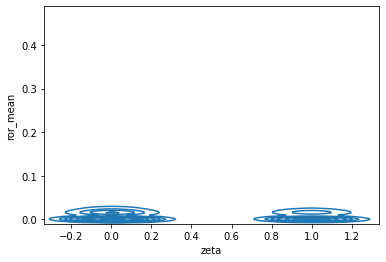

In [99]:
sns.kdeplot(
    data = ssr[ssr['end_day'] > 200],
    x = 'zeta',
    y = 'ror_mean'
)

In [49]:
ssr.sort_values('price_dividend_r_squared')[[
    'price_dividend_r_squared',
    'seconds',
    "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
    
]]

,price_dividend_r_squared,seconds,mmlucasfactor,inst_val_std,zeta,attention,dollars_per_hark_money_unit
12461,7.737505e-09,2525.0,0.001,0.1,0.0,0.1,148.0
2109,5.185605e-05,3324.0,0.001,0.1,0.0,1.0,148.0
13108,2.462509e-04,2531.0,0.001,0.1,1.0,0.1,148.0
13070,6.853112e-04,2811.0,0.001,0.1,1.0,0.1,148.0
2688,1.465182e-03,3016.0,0.001,0.1,1.0,1.0,148.0
...,...,...,...,...,...,...,...
14395,NaN,116.0,0.000,0.1,0.0,0.1,8103.0
14396,NaN,120.0,0.000,0.1,0.0,0.1,8103.0
14397,NaN,124.0,0.000,0.1,0.0,0.1,8103.0
14398,NaN,116.0,0.000,0.1,0.0,0.1,8103.0


In [50]:
ssr.sort_values('price_dividend_r_squared')[[
    'price_dividend_r_squared',
    'status_code',
    "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
    
]].dropna().corr()

,price_dividend_r_squared,status_code,mmlucasfactor,inst_val_std,zeta,attention,dollars_per_hark_money_unit
price_dividend_r_squared,1.000000,NaN,-0.251204,NaN,0.017030,0.014738,-0.909275
status_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mmlucasfactor,-0.251204,NaN,1.000000,NaN,-0.021810,-0.028741,0.470016
inst_val_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zeta,0.017030,NaN,-0.021810,NaN,1.000000,-0.019804,-0.017416
attention,0.014738,NaN,-0.028741,NaN,-0.019804,1.000000,-0.017934
dollars_per_hark_money_unit,-0.909275,NaN,0.470016,NaN,-0.017416,-0.017934,1.000000


In [51]:
ssr.groupby(['status_code']).count()

,Unnamed: 0,PartitionKey,RowKey,ammps,ammps_config_cmd,ammps_config_gen,attention,cmdBundle,dphm,expectations,...,log_dphm,log_mmlucasfactor,log_pop_aLvl_mean,log_aLvlmeanall,log_max_sell_limit,log_max_buy_limit,net_shares,log_net_shares,mean_buy_over_mean_sell,log_ror_volatility
status_code,,,,,,,,,,,,,,,,,,,,,
0.0,5827,5827,5827,5827,5827,5827,5827,5827,5827,5827,...,5827,5827,5827,5827,5827,5827,5827,5827,5827,5827
1.0,8206,8206,8206,8206,8206,8206,8206,8206,8206,8206,...,8206,8206,8206,8206,8206,8206,8206,8206,8206,8206
3.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [54]:
corrs = ssr[[
        "mmlucasfactor",
        "inst_val_std",
        "zeta",
        'attention',
        'dollars_per_hark_money_unit',
        'Expectations_RiskyAvg_mean_final', 'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final', 'Expectations_RiskyStd_std_final',
        'aLvl_meanall', 'aLvl_stdall',
        'end_day',
        'idx_max_asset_price', 'idx_max_buy_limit', 'idx_max_sell_limit',
        'idx_min_asset_price', 'kurtosis_buy_limit',
        'kurtosis_sell_limit', 
        'log_return_autocorrelation_from_DW',
        'log_return_squared_autocorrelation_from_DW',
        'max_asset_price',
        'max_buy_limit', 'max_sell_limit', 'mean_asset_price', 'mean_buy_limit',
        'mean_sell_limit', 'min_asset_price',
        'price_dividend_r_squared',
        'ror_mean',
        'ror_volatility',
        'seconds',
        'skew_buy_limit', 'skew_sell_limit',
        'status_code', 'std_asset_price',
        'std_buy_limit', 'std_sell_limit',
        'total_population_aLvl_mean', 'total_population_aLvl_std'
]].corr()


(abs(corrs ) > 1e-2) * corrs

,mmlucasfactor,inst_val_std,zeta,attention,dollars_per_hark_money_unit,Expectations_RiskyAvg_mean_final,Expectations_RiskyAvg_std_final,Expectations_RiskyStd_mean_final,Expectations_RiskyStd_std_final,aLvl_meanall,...,ror_volatility,seconds,skew_buy_limit,skew_sell_limit,status_code,std_asset_price,std_buy_limit,std_sell_limit,total_population_aLvl_mean,total_population_aLvl_std
mmlucasfactor,1.000000,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.189178,0.200881,0.576948,...,0.125809,0.435742,-0.201584,0.077885,-0.478694,0.155581,0.156452,0.344436,0.576948,0.185593
inst_val_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zeta,-0.000000,NaN,1.000000,-0.012312,-0.012618,-0.000000,-0.000000,0.153332,0.163631,0.000000,...,-0.021507,0.000000,0.025109,-0.000000,-0.000000,-0.019073,-0.000000,-0.011632,0.000000,-0.015882
attention,-0.000000,NaN,-0.012312,1.000000,-0.011892,-0.000000,-0.000000,0.195169,-0.132296,0.060595,...,-0.013713,0.152305,-0.293894,0.000000,-0.014686,-0.000000,0.150427,0.019787,0.060595,0.000000
dollars_per_hark_money_unit,-0.000000,NaN,-0.012618,-0.011892,1.000000,-0.000000,-0.000000,0.151388,0.147836,-0.138620,...,0.363951,-0.690077,-0.320530,0.166690,0.529068,0.547194,0.369774,0.698977,-0.138620,-0.078014
Expectations_RiskyAvg_mean_final,-0.000000,NaN,-0.000000,-0.000000,-0.000000,1.000000,1.000000,-0.000000,0.101401,0.000000,...,0.205533,0.000000,0.040557,-0.000000,-0.000000,0.033396,0.000000,-0.000000,0.000000,0.330504
Expectations_RiskyAvg_std_final,-0.000000,NaN,-0.000000,-0.000000,-0.000000,1.000000,1.000000,-0.000000,0.101401,0.000000,...,0.205533,0.000000,0.040557,-0.000000,-0.000000,0.033396,0.000000,-0.000000,0.000000,0.330504
Expectations_RiskyStd_mean_final,0.189178,NaN,0.153332,0.195169,0.151388,-0.000000,-0.000000,1.000000,0.280053,0.044006,...,0.346727,-0.016921,-0.056001,0.224758,0.068685,0.310441,0.391066,0.321776,0.044006,0.085331
Expectations_RiskyStd_std_final,0.200881,NaN,0.163631,-0.132296,0.147836,0.101401,0.101401,0.280053,1.000000,0.063125,...,0.322553,-0.037763,0.020043,0.213052,0.057039,0.313145,0.188487,0.329634,0.063125,0.146444
aLvl_meanall,0.576948,NaN,0.000000,0.060595,-0.138620,0.000000,0.000000,0.044006,0.063125,1.000000,...,-0.026400,0.649749,-0.327226,-0.158944,-0.762897,0.311153,-0.012623,0.106917,1.000000,0.422862


array([[<Axes: title={'center': 'end_day'}>]], dtype=object)

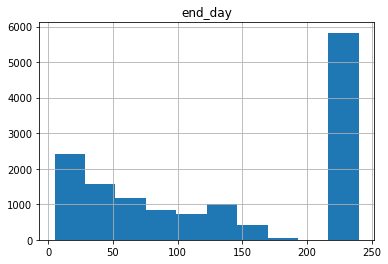

In [55]:
ssr[['end_day']].hist()

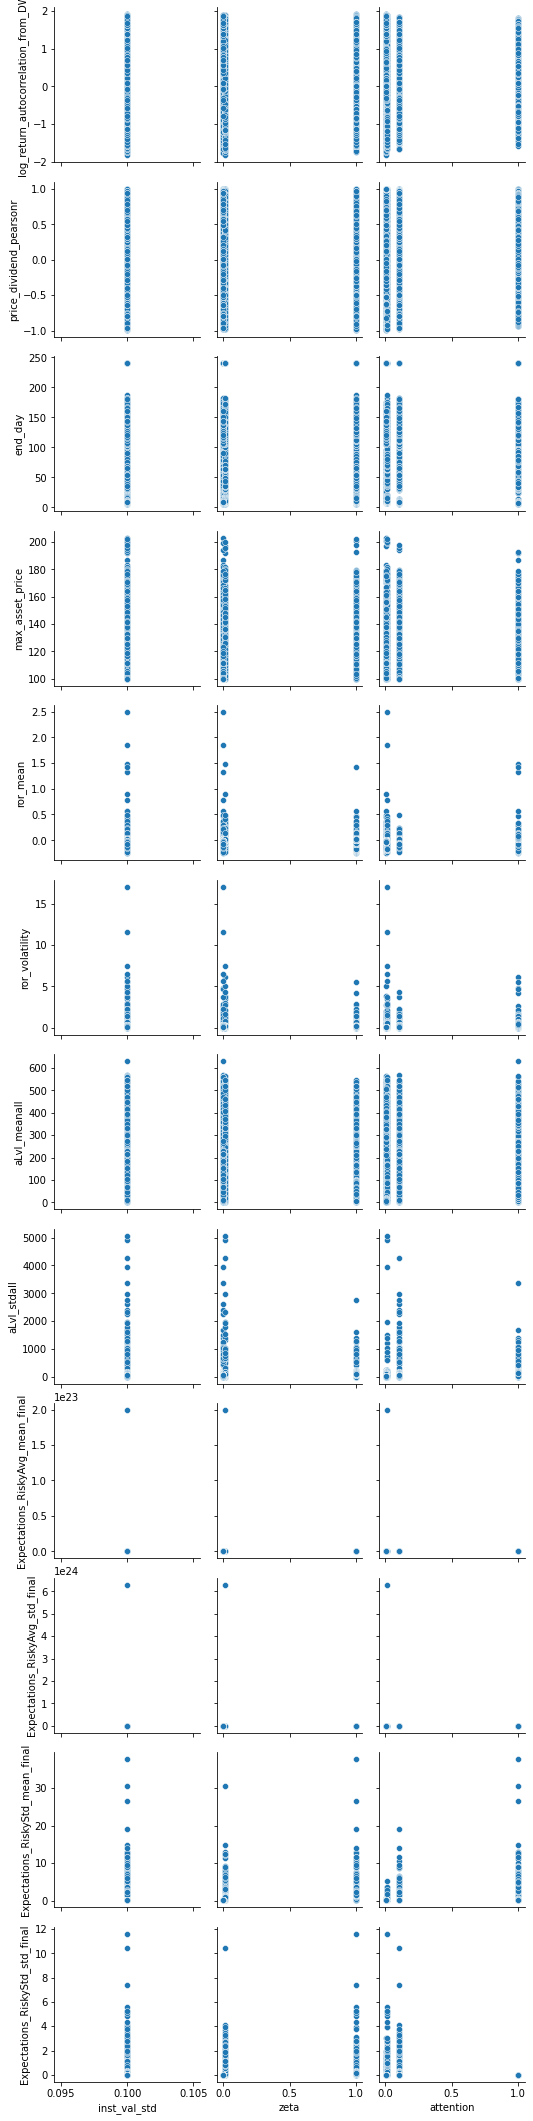

In [56]:
sns.pairplot(
    data = ssr,
    x_vars = [
        "inst_val_std",
        "zeta",
        "attention",
    ],
    y_vars = [
        'log_return_autocorrelation_from_DW',
        'price_dividend_pearsonr',
        'end_day',
        'max_asset_price',
        'ror_mean',
        'ror_volatility',
        'aLvl_meanall',
        'aLvl_stdall',
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyAvg_std_final',
        'Expectations_RiskyStd_mean_final',
        'Expectations_RiskyStd_std_final',
    ]
)

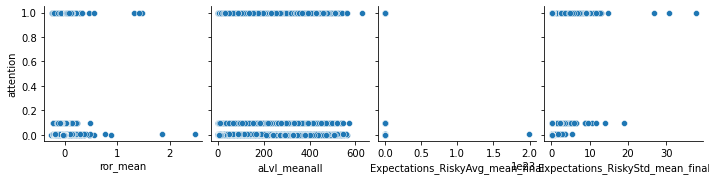

In [57]:
sns.pairplot(
    data = ssr,
    x_vars = [
        'ror_mean',
        'aLvl_meanall',
        'Expectations_RiskyAvg_mean_final',
        'Expectations_RiskyStd_mean_final',
        
    ],
    y_vars = [
        "attention",
        
    ]
)

In [59]:


ssr.groupby([
    'mmsize',
    "mmlucasfactor",
    'dollars_per_hark_money_unit',
])[
    #"inst_val_std",
    "zeta",
    "attention",
    'price_dividend_pearsonr',
    #'end_day',
    #'ror_mean',
    'ror_volatility',
    #'aLvl_meanall',
    #'Expectations_RiskyAvg_mean_final',
    #'Expectations_RiskyAvg_std_final',
    #'Expectations_RiskyStd_mean_final',
    #'Expectations_RiskyStd_std_final',
].corr()[[
    'zeta'
    #'price_dividend_pearsonr',
    #'end_day',
    #'ror_mean',
    #'ror_volatility',
    #'aLvl_meanall',
    #'Expectations_RiskyAvg_mean_final',
    #'Expectations_RiskyAvg_std_final',
    #'Expectations_RiskyStd_mean_final',
    #'Expectations_RiskyStd_std_final',
]]

        
        
        

KeyError: 'mmsize'

In [ ]:
inst_val_corr = ssr.corr()["inst_val_std"]

inst_val_corr[inst_val_corr > 0.002]

In [ ]:
ssr['agent-settings'] = ssr['mmsize'] + ssr["mmlucasfactor"] + ssr['dollars_per_hark_money_unit'] + ssr['pop_aNrmInitMean']


In [ ]:
ssr['agent-settings']

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'log_ror_volatility',
    hue = 'agent-settings'
)

In [ ]:
ssr['mmsize']

In [ ]:
ssrx = ssr.groupby([
    'mmsize',
    "mmlucasfactor",
    'dollars_per_hark_money_unit',
    'pop_aNrmInitMean'
])[['ror_volatility','Expectations_RiskyStd_mean_final']].corr().reset_index()


sns.pairplot(
    data = ssrx[ssrx['level_4'] == 'Expectations_RiskyStd_mean_final'],
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean'
    ],
    y_vars = [
        'ror_volatility'
    ]
)


In [ ]:
ssry = ssr.groupby([
    'mmsize',
    "mmlucasfactor",
    'dollars_per_hark_money_unit',
    'pop_aNrmInitMean',
    'attention',
    'zeta'
])[['ror_mean','Expectations_RiskyAvg_mean_final']].corr().reset_index()

ssry = ssry[ssry['level_6'] == 'Expectations_RiskyAvg_mean_final']

sns.pairplot(
    data = ssry[ssry['level_6'] == 'Expectations_RiskyAvg_mean_final'],
    x_vars = [
        'mmsize',
        "mmlucasfactor",
        'dollars_per_hark_money_unit',
        'pop_aNrmInitMean',
        'attention',
        'zeta'
    ],
    y_vars = [
        'ror_mean'
    ]
)

In [ ]:
sns.kdeplot(
    data = ssry,
    x = 'ror_mean',
    hue = 'attention'
)

In [ ]:
sns.kdeplot(
    data = ssry,
    x = 'ror_mean',
    hue = 'dollars_per_hark_money_unit'
)

In [ ]:
ssr.columns

In [ ]:
ssr[ssr['mmsize'] == 105]['pop_log_power']

In [ ]:

from scipy.stats import zscore

In [ ]:
zscore(ssr['attention']) - zscore(ssr['attention'])

In [ ]:
plt.hist(np.exp(ssr['pop_aNrmInitMean']) - ssr['aLvl_meanall'], bins=100)

In [ ]:
(np.exp(ssr['pop_aNrmInitMean']) - ssr['aLvl_meanall'])

In [ ]:
sns.kdeplot(
    data = ssr,
    x = 'log_ror_volatility',
    hue = 'agent-settings'
)